In [385]:
# pakage import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas import DataFrame, Series
from matplotlib import cm
from matplotlib import font_manager,rc
rc('font', family='AppleGothic')

In [68]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

In [69]:
df = pd.read_csv('Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [71]:
df.isnull().sum() # null 값 확인

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [72]:
# 필요없는 변수 제거
# Over18, EmployeeCount,EmployeeNumber,StandardHours

df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [73]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print(len(object_col))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8


In [74]:
# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print(len(int_col))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


In [75]:
#df.describe() # int형 변수

# employeecount,employeenumber,standardhours : 제외

#int_col.remove('EmployeeCount')
#int_col.remove('EmployeeNumber')
#int_col.remove('StandardHours')
#print(int_col)
#print(len(int_col))
# 사실상 카테고리 변수   ---> 어떻게 처리?  --> map 써서 카테고리형으로?
# education, employeenumber, environmentsatisfaction, jobinvolvement, joblevel, jobsatisfaction, preformancerating, relationshipsatisfaction, worklifebalance

In [76]:
#df.drop('Over18',inplace=True,axis=1)
# over18 : 제외
#object_col.remove('Over18')

#print(object_col)
#print(len(object_col))

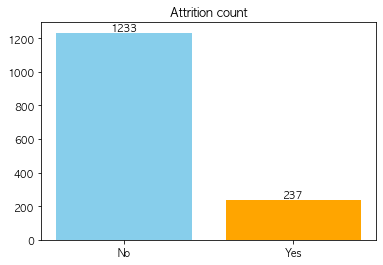

In [77]:
# Attrition count

plt.bar(df['Attrition'].value_counts().index,df['Attrition'].value_counts(),
       color=('skyblue','orange'))
for i, v in enumerate(df['Attrition'].value_counts().index):
    plt.text(v,df['Attrition'].value_counts()[i],df['Attrition'].value_counts()[i],
             fontsize = 10,
             color = 'black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title('Attrition count')
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

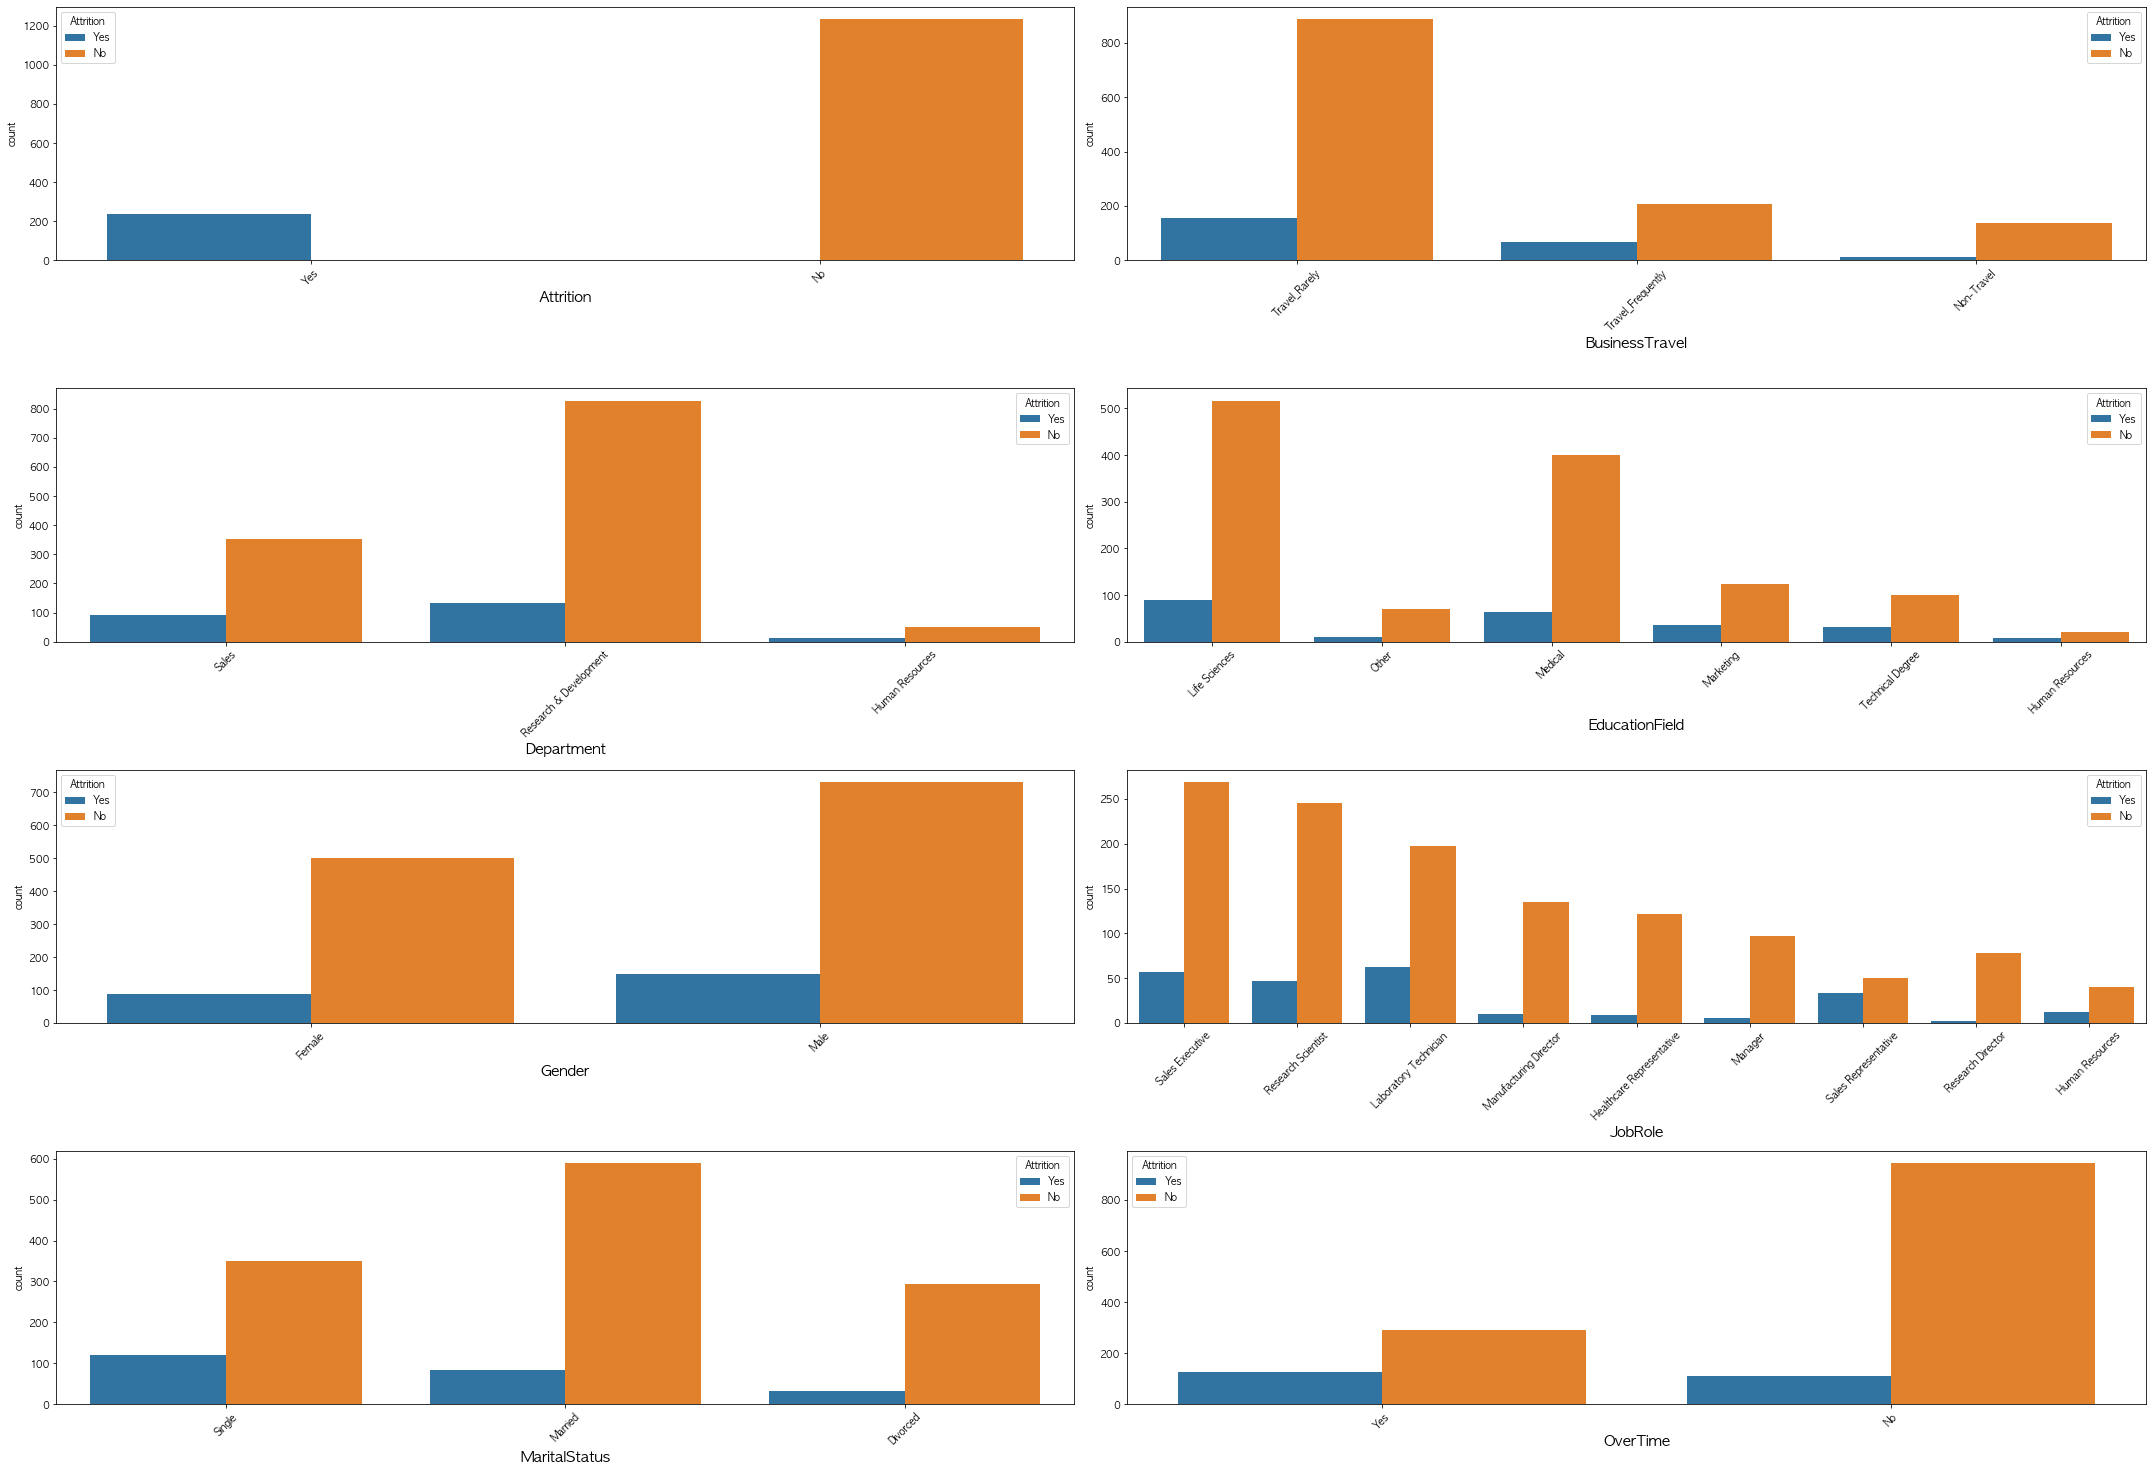

In [78]:
# 카테고리 변수 - 퇴직 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,2,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 8:
        break
    l += 1
fig.tight_layout()
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


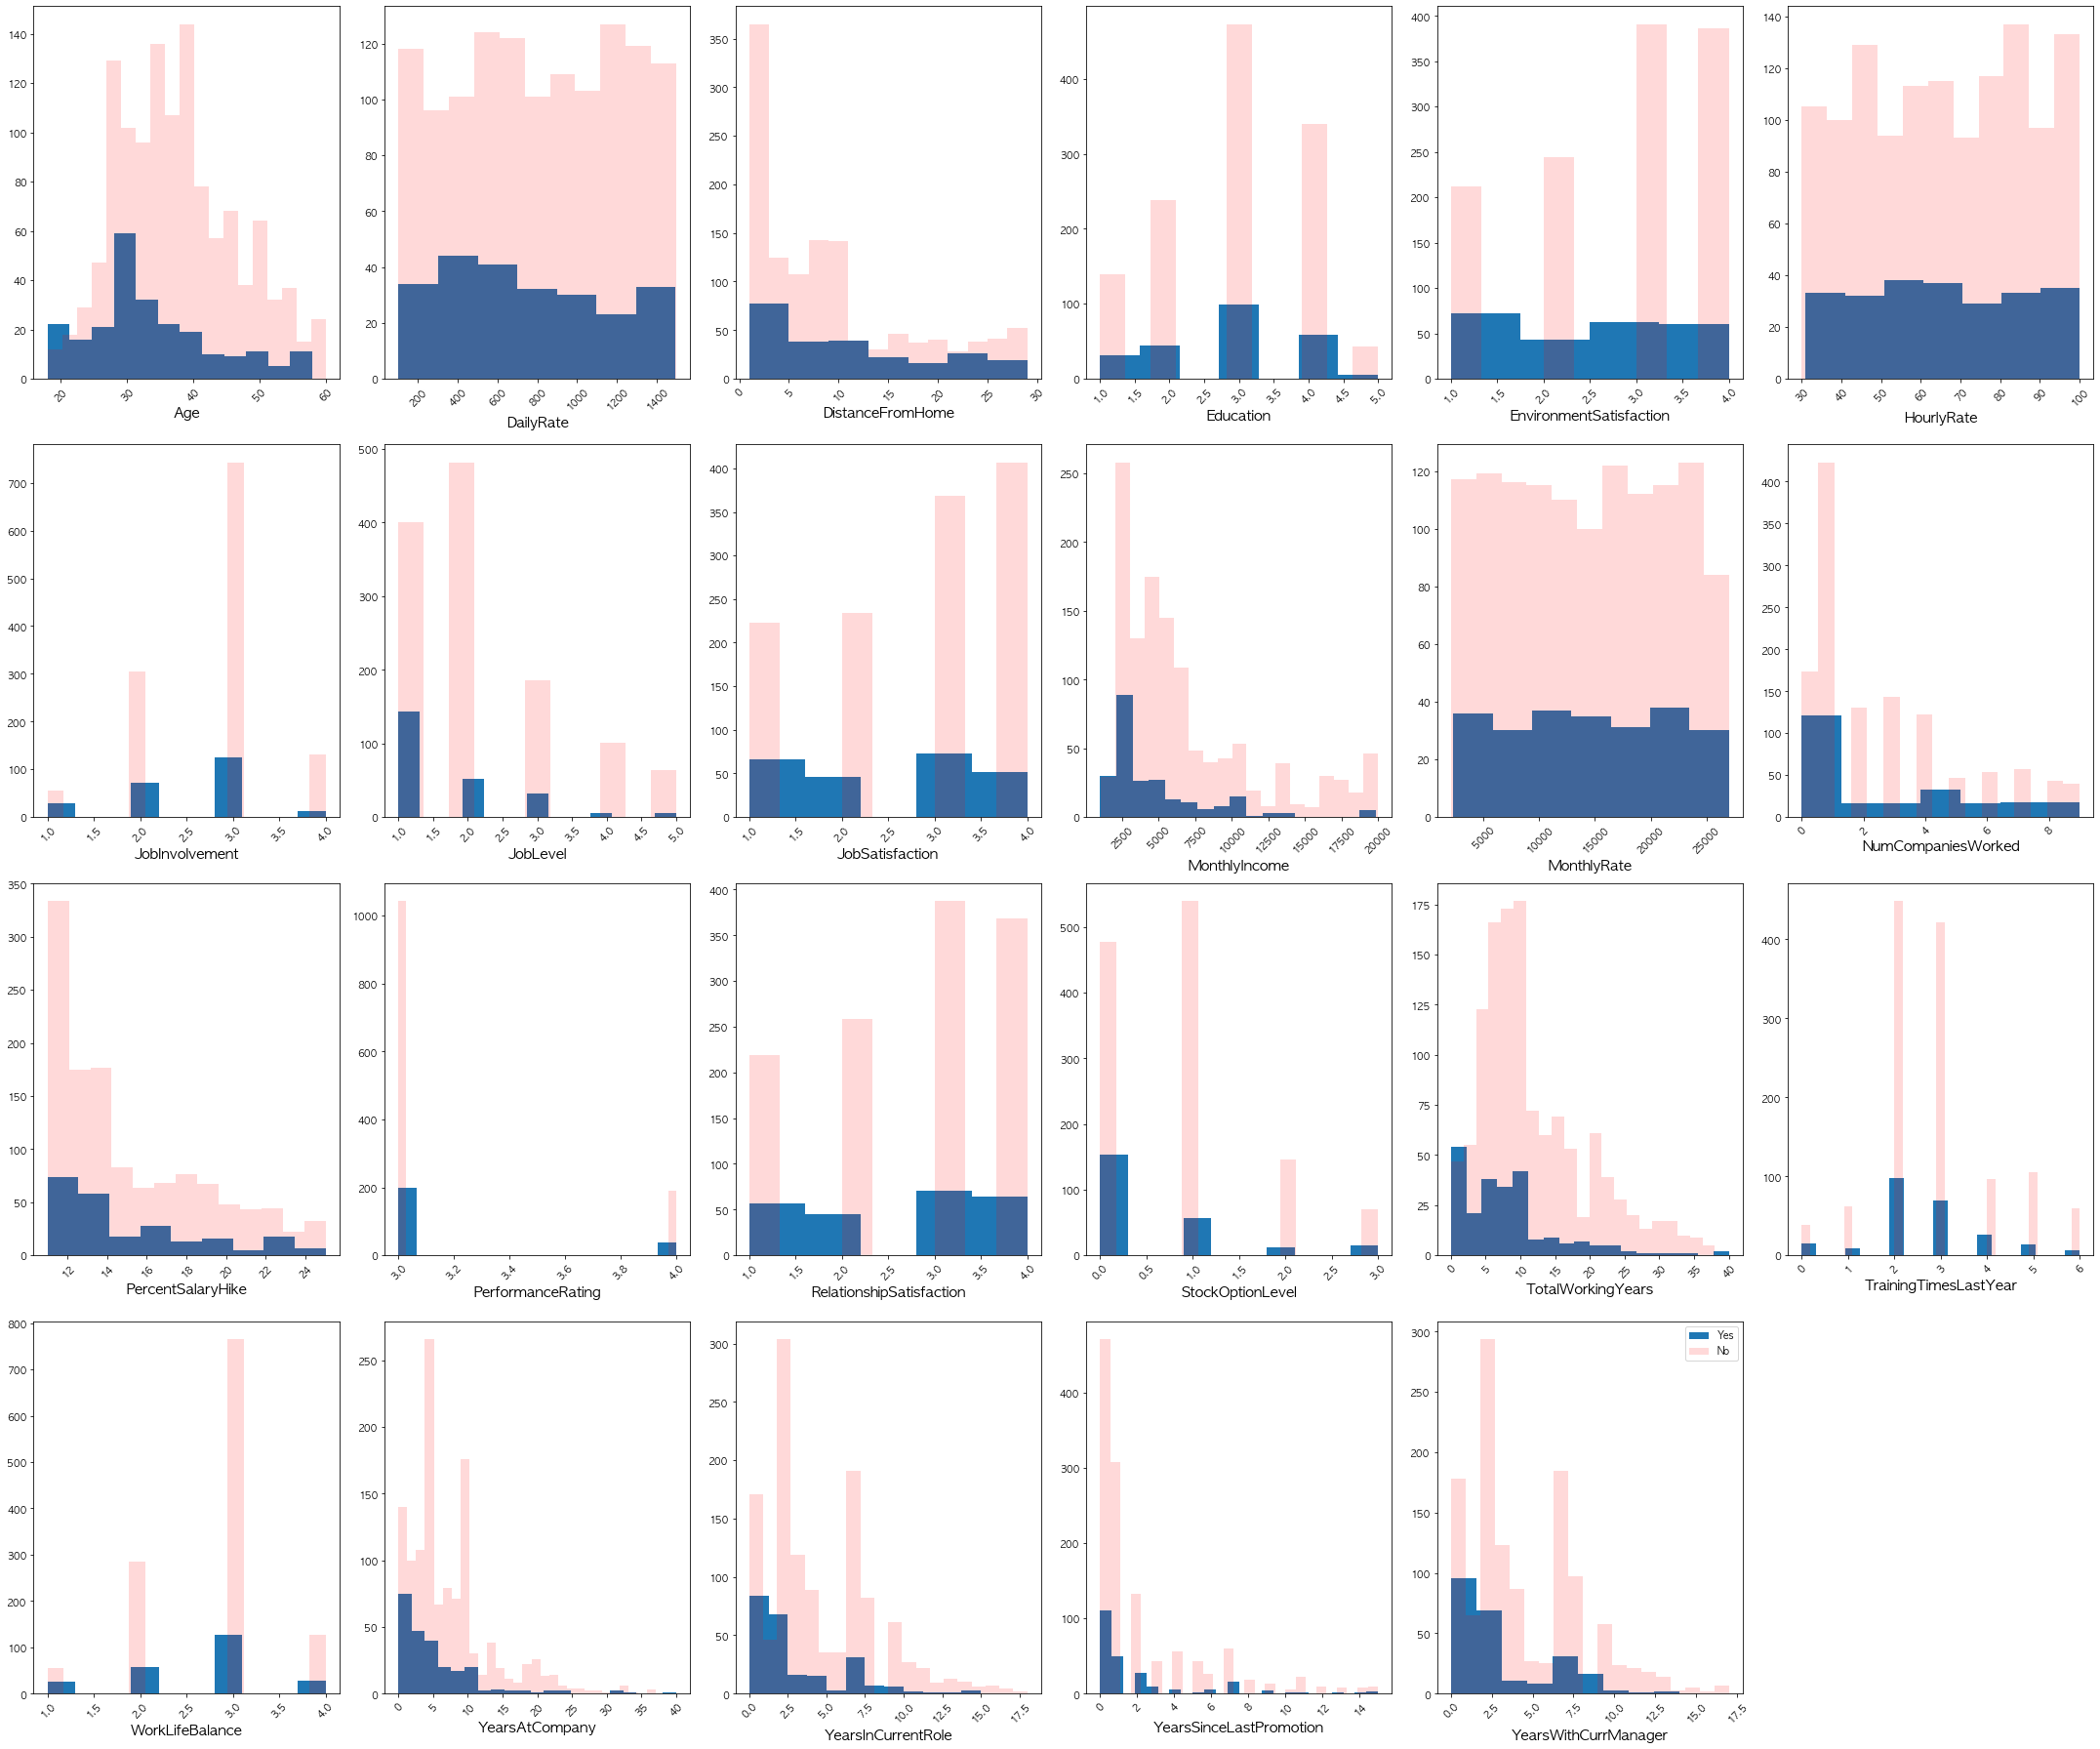

In [79]:
# int 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,6,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 23:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

In [80]:
# int 변수 -> object 변수

df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'},inplace=True)
df['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['PerformanceRating'].replace({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'},inplace=True)
df['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['WorkLifeBalance'].replace({1:'Bad',2:'Good',3:'Better',4:'Best'},inplace=True)

# object 변수로 변환했기 때문에 object_col,int_col 다시 만들고 그래프도 다시 그린다

In [81]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print(len(object_col))

# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print(len(int_col))

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
15
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
16


/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

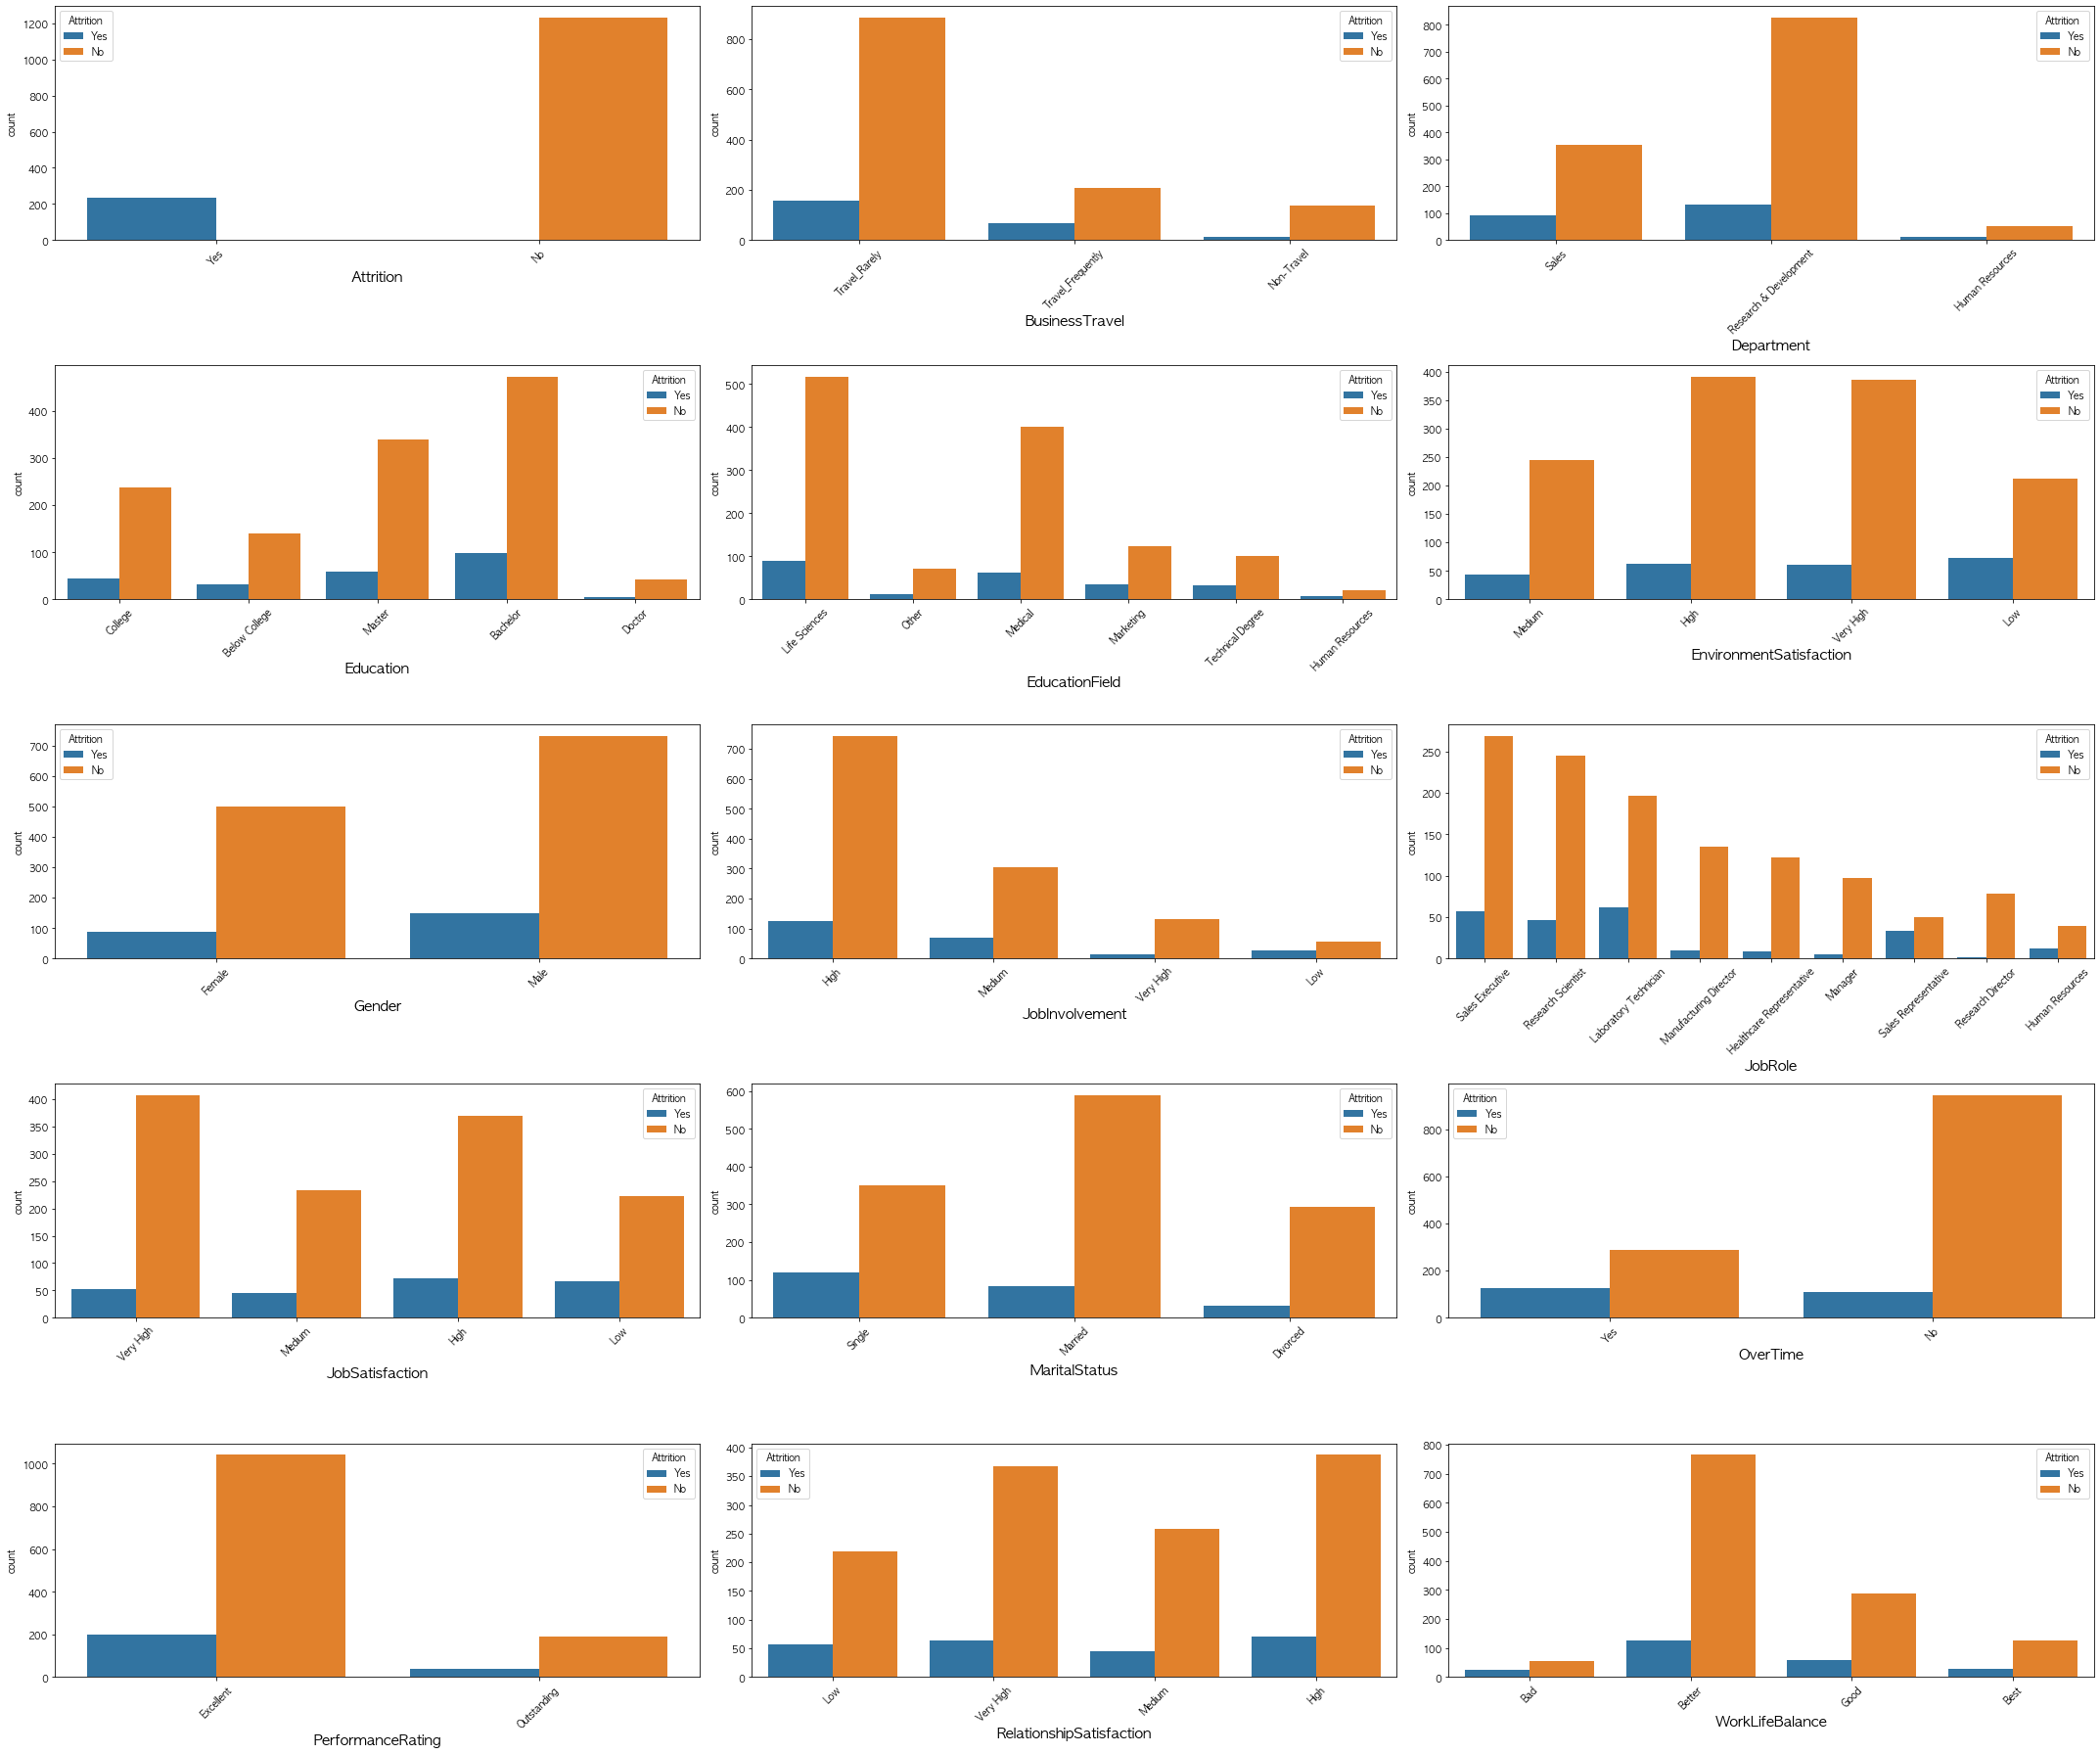

In [82]:
# 카테고리 변수 - 퇴직 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,3,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 15:
        break
    l += 1
fig.tight_layout()
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


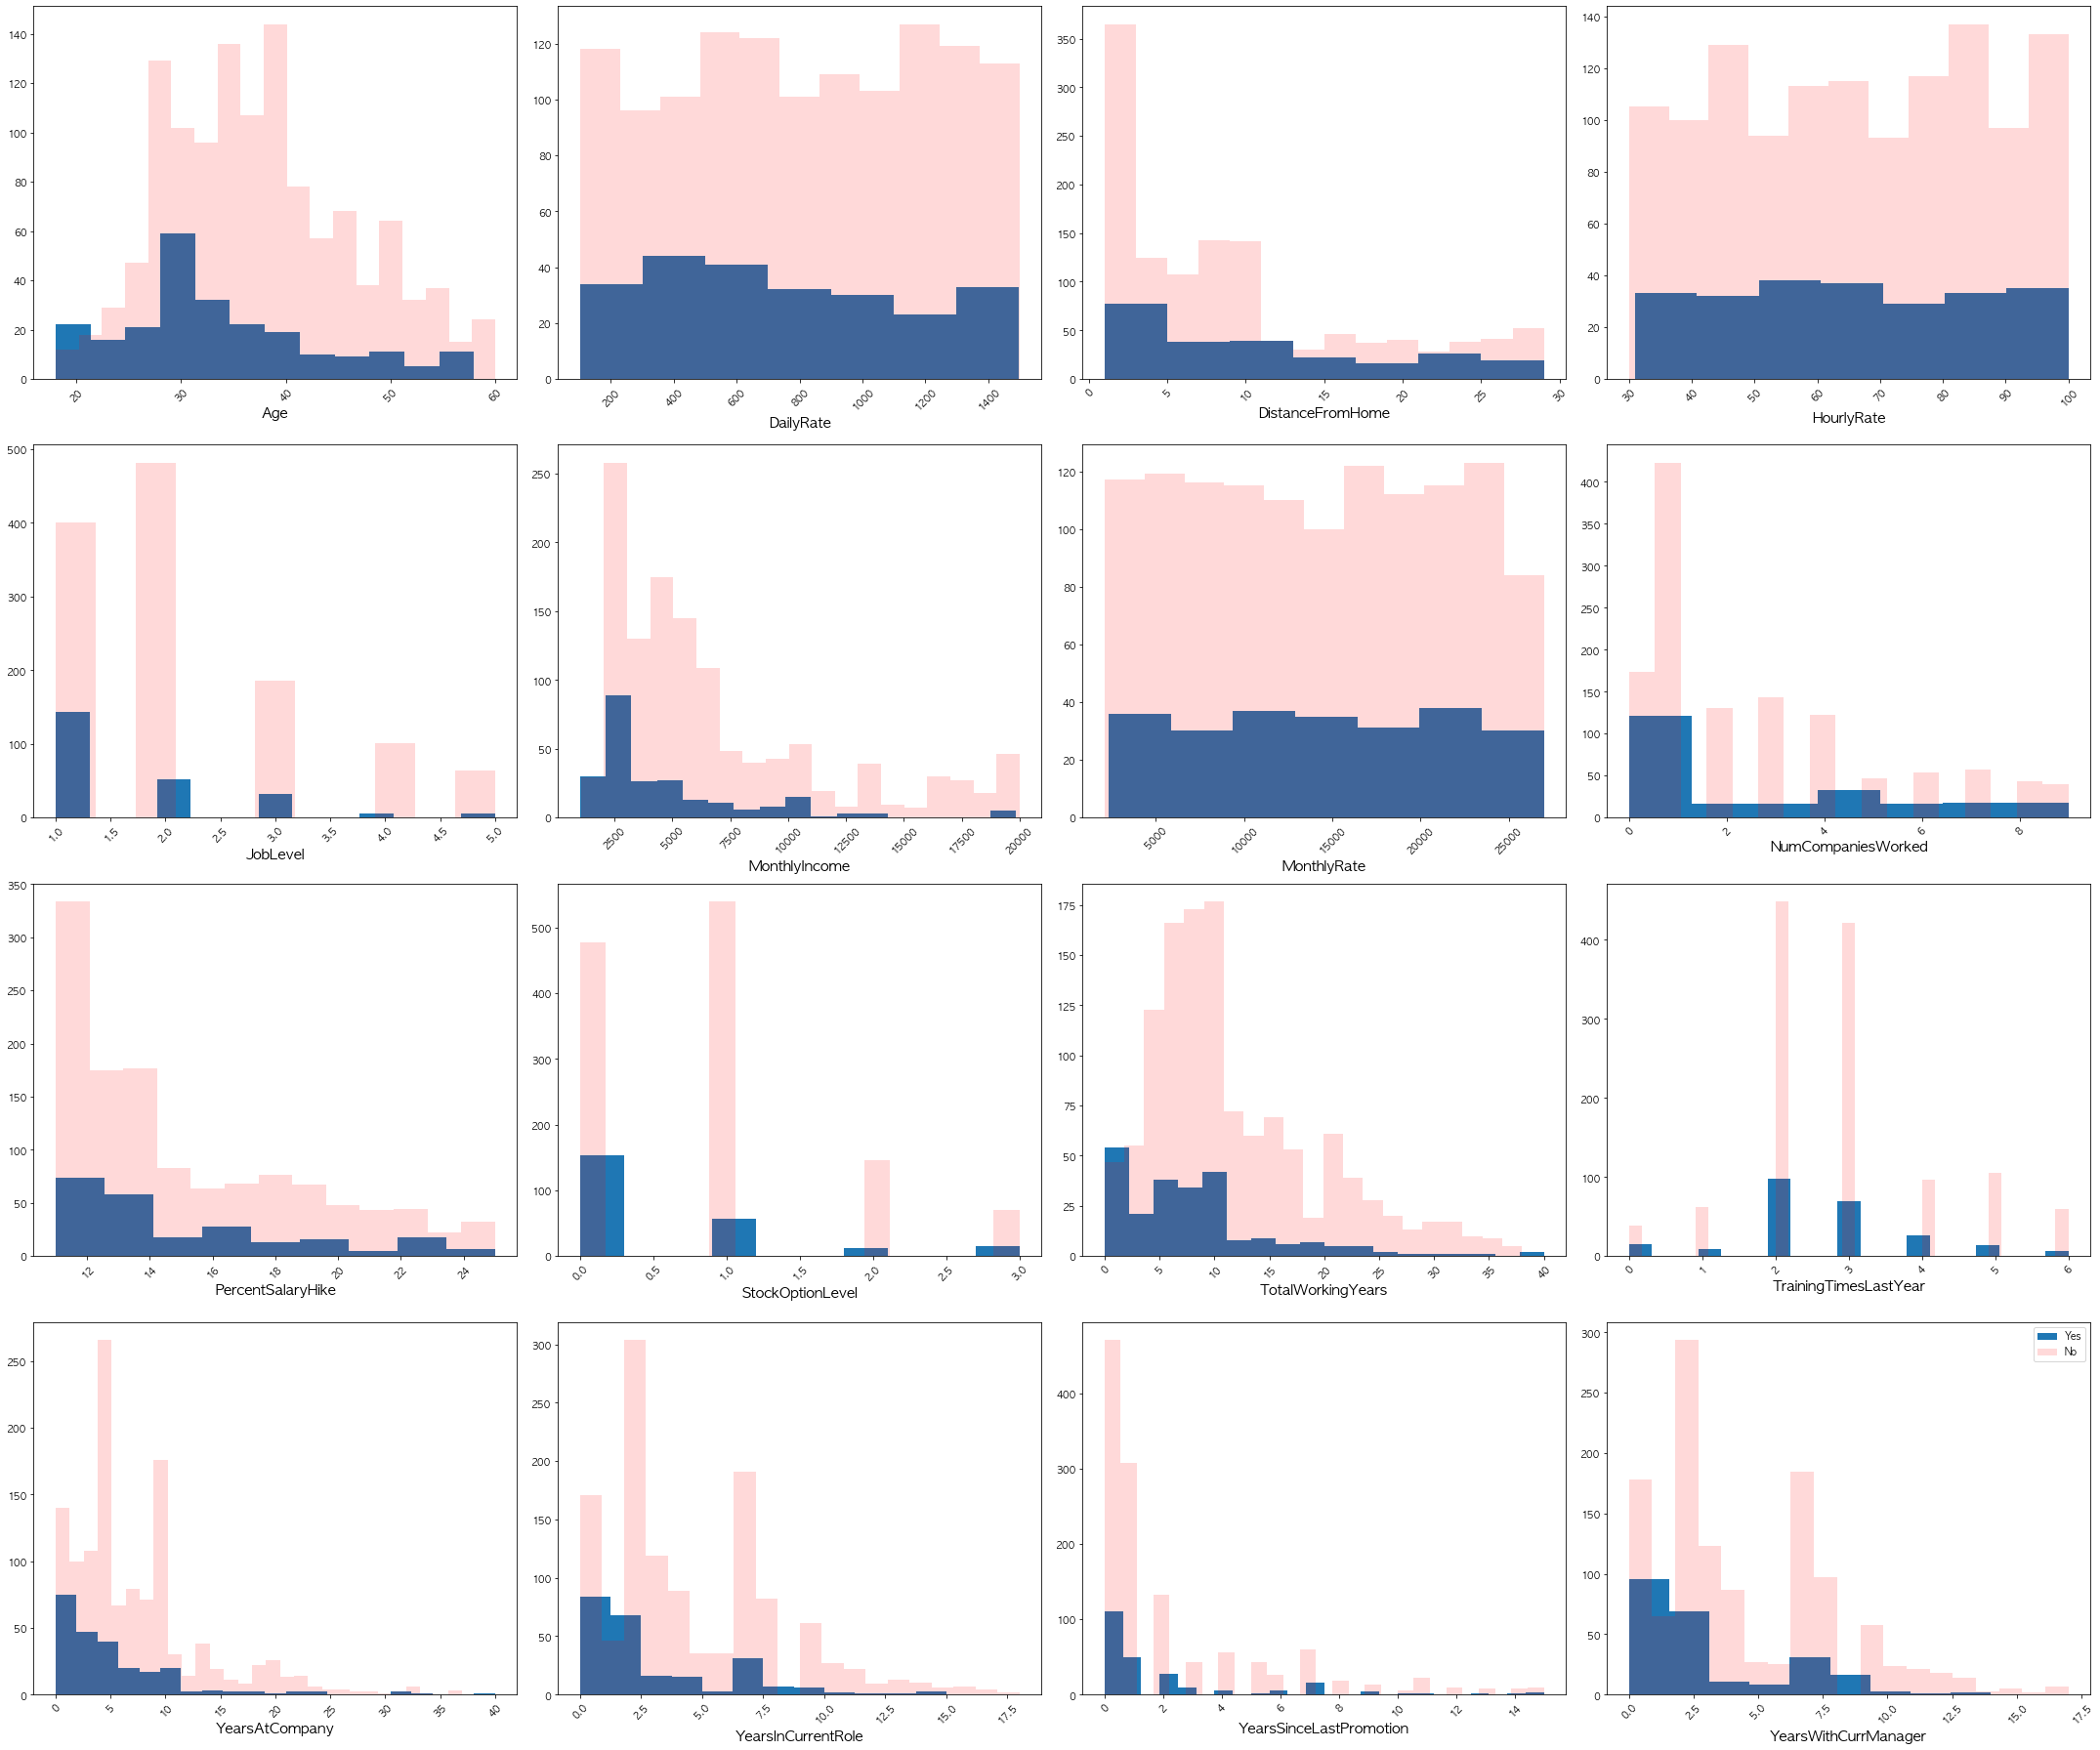

In [83]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

In [84]:
# 가설

출장 빈도
부서별
월소득이 낮으면 퇴사, 연봉인상율, 스톡옵션, 마지막 프로모션
업무환경, 업무만족도가 낮으면 퇴사
업무참여도
업무종류
워라밸이 낮으면 퇴사
결혼 여부에 따른 퇴사
근속 연수에 따른 퇴사
업무 종류, 수준에 따른 퇴사
경력 기간, 근속 연수, 현재 역할의 년수

경력 기간과 근속 연수가 왜 다를까? -> 다녔던 회사의 수가 문제일까?
# object 형식은 ratio_graph
# int 형식은 boxplot

# 이상치 제거 전에 가설 검증부터 해야된다
# 이상치 제거 전에 상관계수로 어떤 변수들이 상관이 있나 봐야한다

In [405]:
len(df[df['TotalWorkingYears']==0]) # 경력 기간이 0인 직원 : 11명
len(df[df['YearsAtCompany']==0])    # 근속 연수가 0인 직원 : 44명

df[(df['TotalWorkingYears']==0) & (df['YearsAtCompany']==0)][['TotalWorkingYears','YearsAtCompany']]

len(df[df['NumCompaniesWorked']==0]) # 일한 회사수가 0 인 직원 : 197명.   (? 왜 0개?) # 현재 회사가 첫회사면 0?

df[(df['TotalWorkingYears']==0) & (df['YearsAtCompany']==0)][['TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']]

df[df['NumCompaniesWorked']==0][['TotalWorkingYears','YearsAtCompany']] # 일한 회사가 0개, 경력기간과 근속 연수가 1씩 차이 , 197명
df[df['TotalWorkingYears']-df['YearsAtCompany']==1]['NumCompaniesWorked']

5       0
8       0
10      0
11      0
13      0
       ..
1439    0
1445    0
1462    0
1463    0
1464    0
Name: NumCompaniesWorked, Length: 244, dtype: int64

In [378]:
# # 출장빈도에 따라서 퇴직

# # 컬럼에 대한 퇴직자 비율
# def ratio_attrition_yes(col):
    
#     a = df[df['Attrition']=='Yes'].groupby(df[col]).size()
    
#     ratio = []
#     for i in range(len(a)):
#         temp = a[i]/len(df[df['Attrition']=='Yes'])
#         ratio.append(temp)
    
#     return ratio

# # 컬럼에 대한 미퇴직자 비율
# def ratio_attrition_no(col):
    
#     b = df[df['Attrition']=='No'].groupby(df[col]).size()
    
#     ratio = []
#     for i in range(len(b)):
#         temp = b[i]/len(df[df['Attrition']=='No'])
#         ratio.append(temp)
    
#     return ratio



def ratio_graph(col):
    
    def ratio_attrition_yes(col):
    
        a = df[df['Attrition']=='Yes'].groupby(df[col]).size()

        ratio = []
        for i in range(len(a)):
            temp = a[i]/len(df[df['Attrition']=='Yes'])
            ratio.append(temp)

        return ratio

    # 컬럼에 대한 미퇴직자 비율
    def ratio_attrition_no(col):
    
        b = df[df['Attrition']=='No'].groupby(df[col]).size()

        ratio = []
        for i in range(len(b)):
            temp = b[i]/len(df[df['Attrition']=='No'])
            ratio.append(temp)

        return ratio
    
    colors = sns.color_palette('Blues',len(df[col].unique()))
    
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(df[df['Attrition']=='Yes'].groupby(df[col]).size().index,ratio_attrition_yes(col),color=colors)
    ax1.set_title('Attrition Yes',fontsize=12)
    ax2.bar(df[df['Attrition']=='No'].groupby(df[col]).size().index,ratio_attrition_no(col),color=colors)
    ax2.set_title('Attrition No',fontsize=12)
    # plt.show()
    
    for i, v in enumerate(df[df['Attrition']=='Yes'].groupby(df[col]).size().index):
        ax1.text(v,ratio_attrition_yes(col)[i],round(ratio_attrition_yes(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(df[df['Attrition']=='No'].groupby(df[col]).size().index):
        ax2.text(v,ratio_attrition_no(col)[i],round(ratio_attrition_no(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
    plt.show()

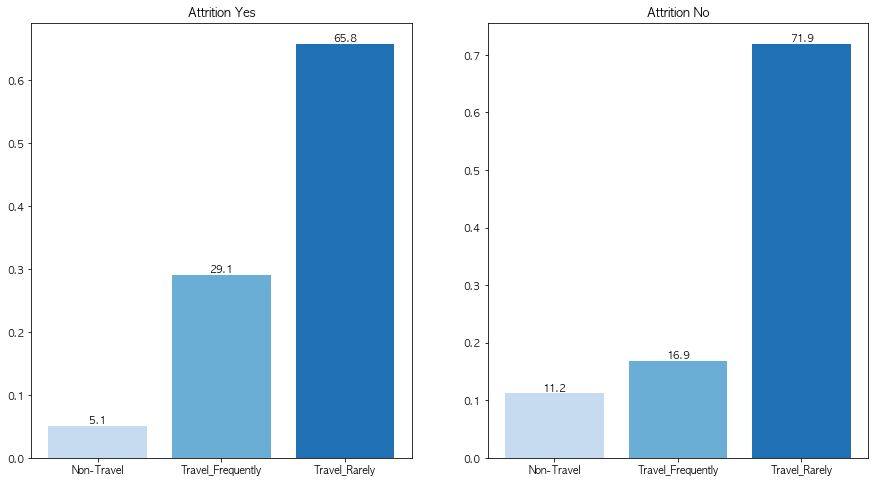

In [379]:
ratio_graph('BusinessTravel')

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


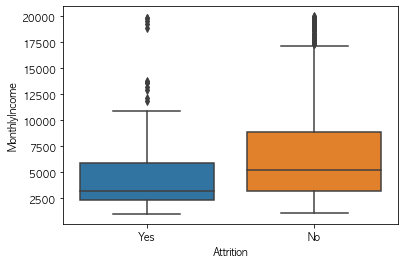

In [85]:
sns.boxplot('Attrition','MonthlyIncome',data=df)
plt.show()

In [284]:
object_col

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

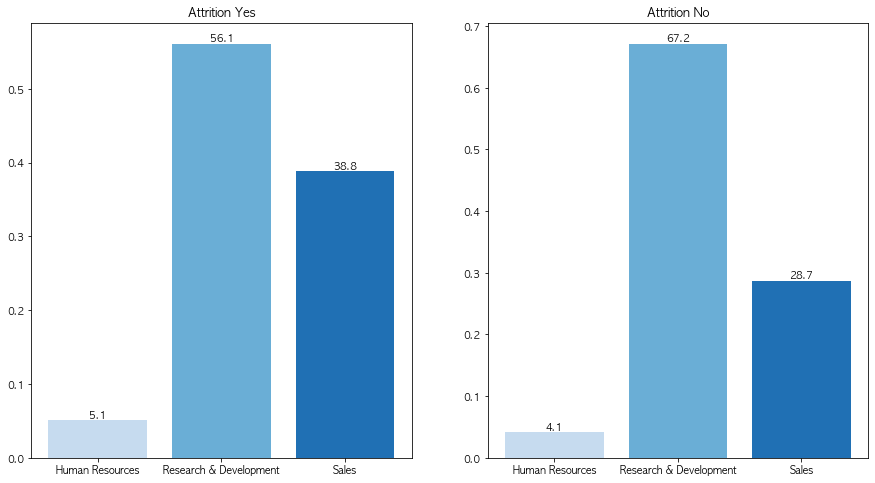

In [380]:
ratio_graph('Department')

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


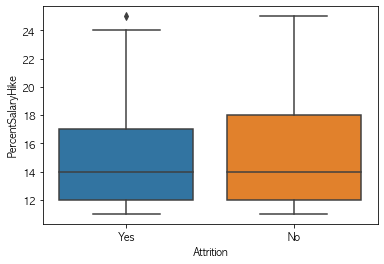

In [86]:
sns.boxplot('Attrition','PercentSalaryHike',data=df)
plt.show()
# 연봉 인상율은 크게 관련이 없다

In [87]:
# sns.boxplot('Attrition','EnvironmentSatisfaction',data=df)
# plt.show()

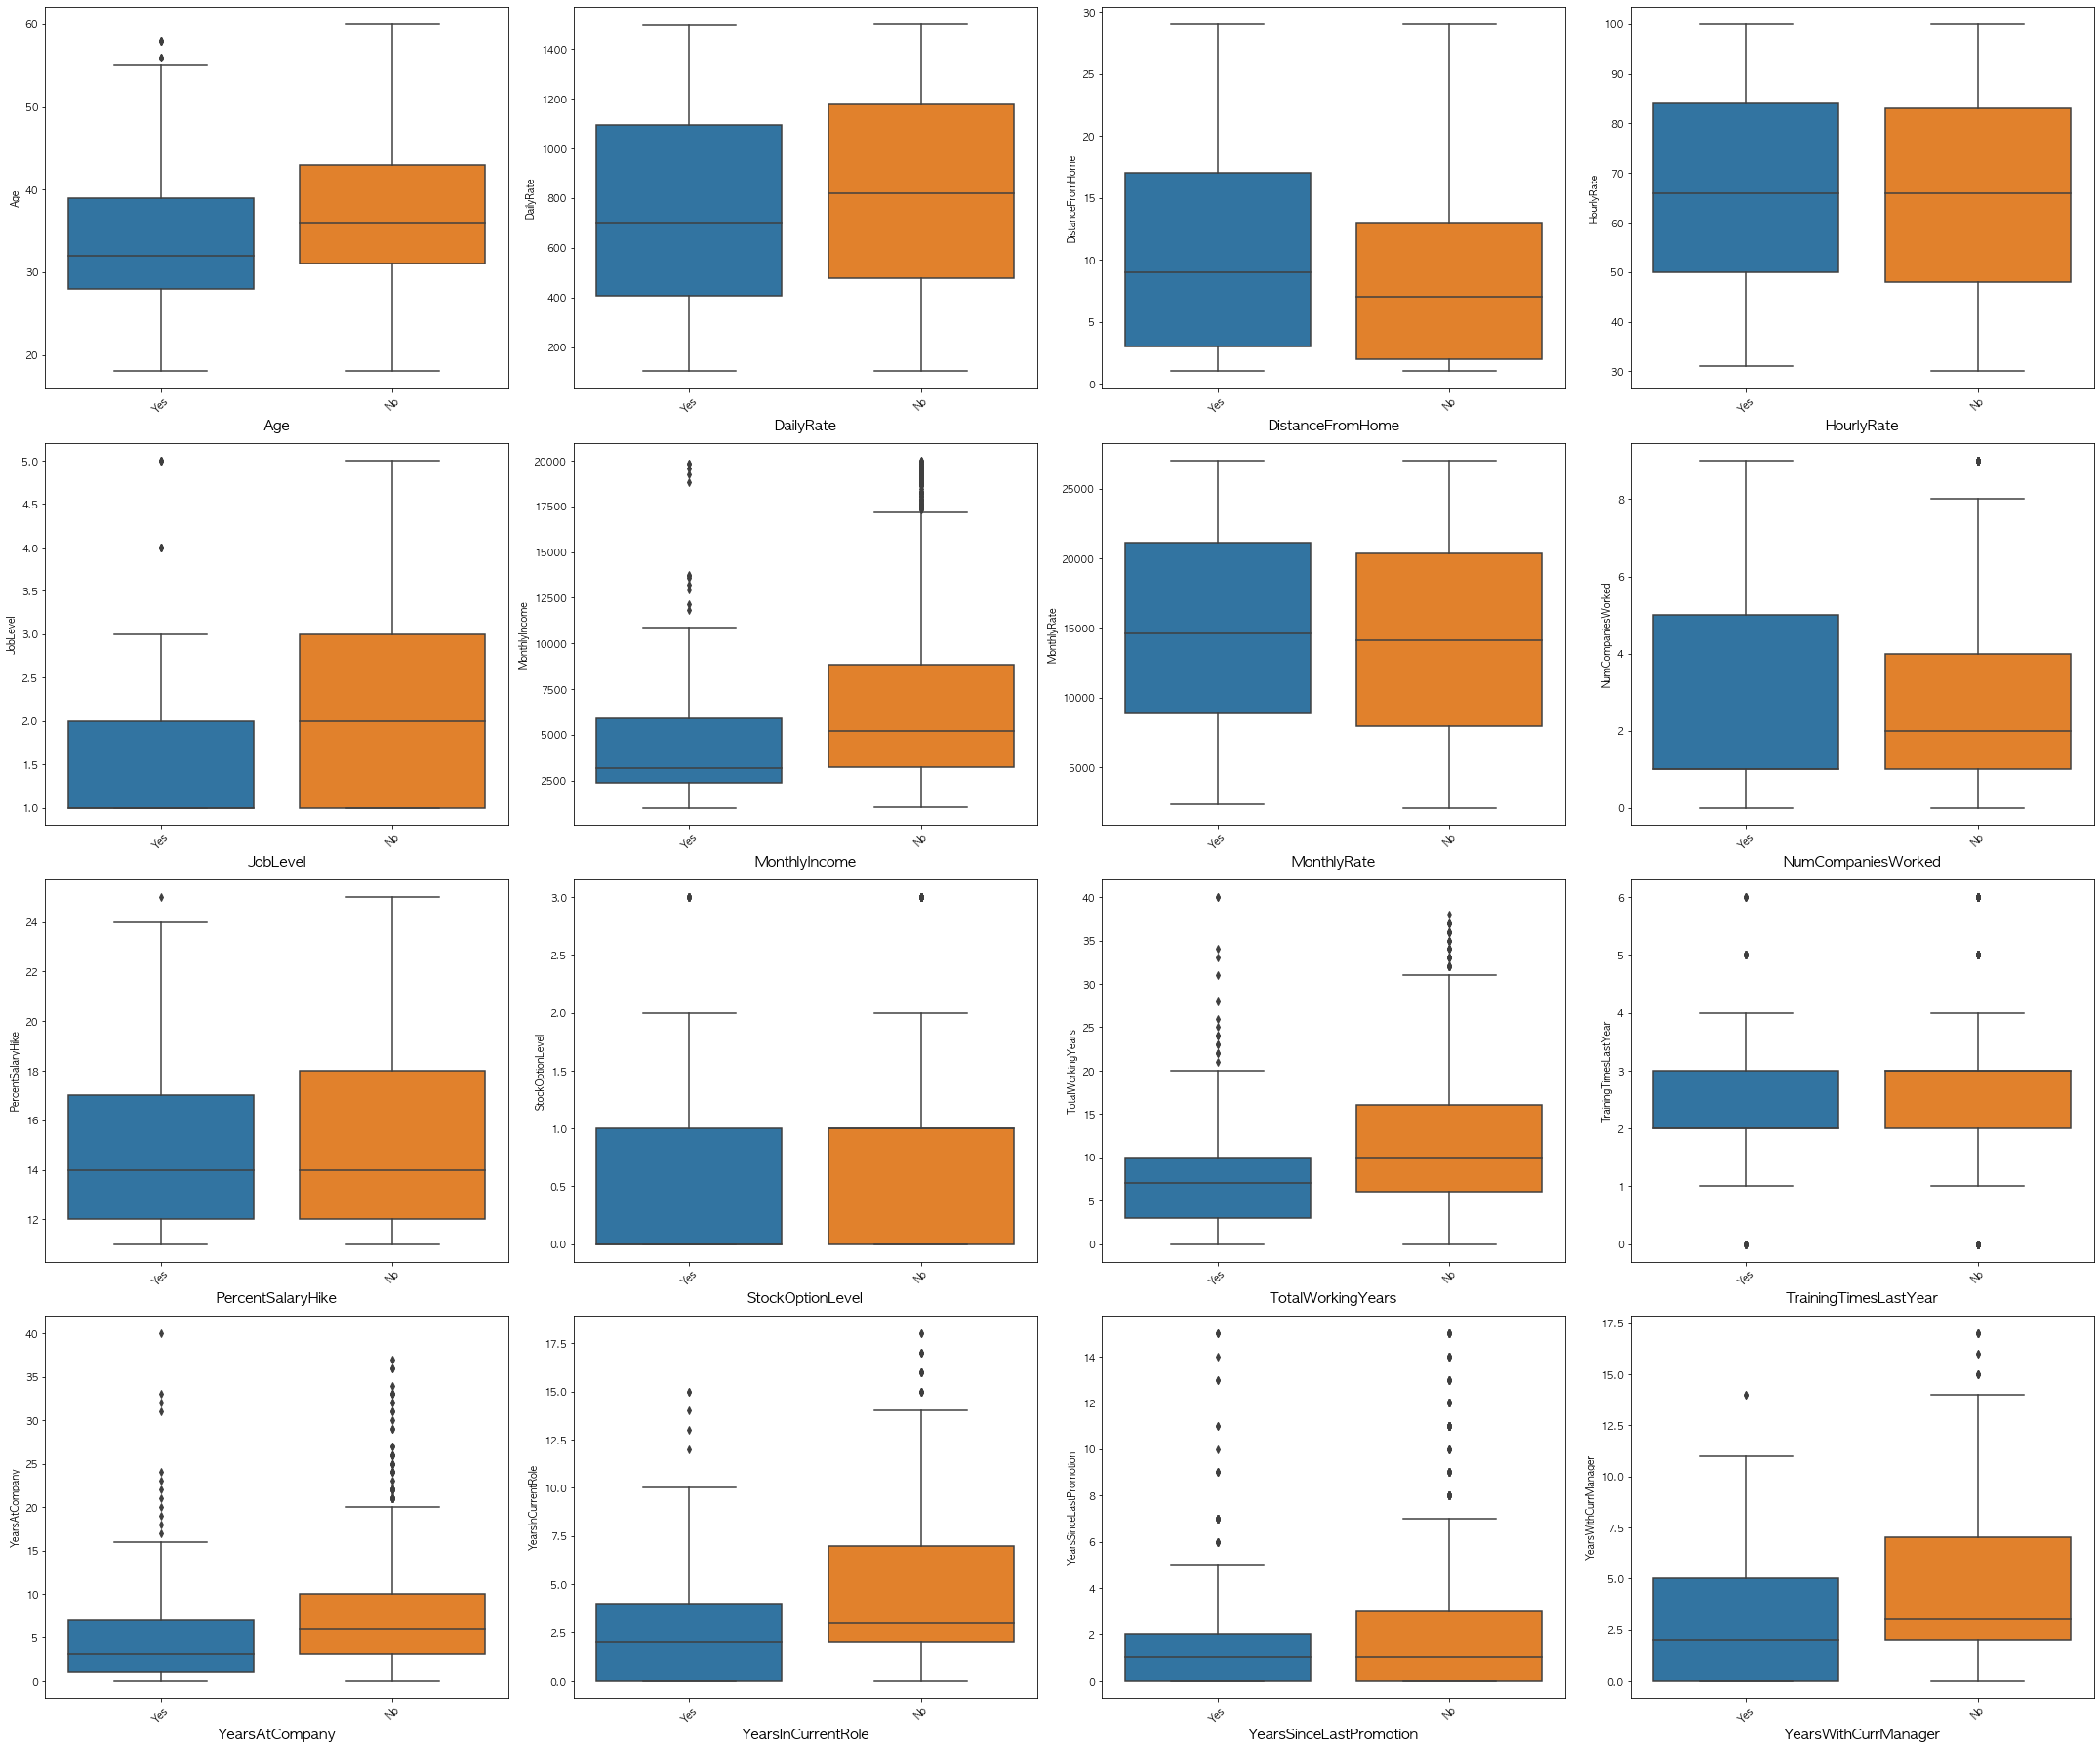

In [88]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.boxplot(y=df[int_col[i]],x=df['Attrition'])
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.show()

In [89]:
len(int_col)

16

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

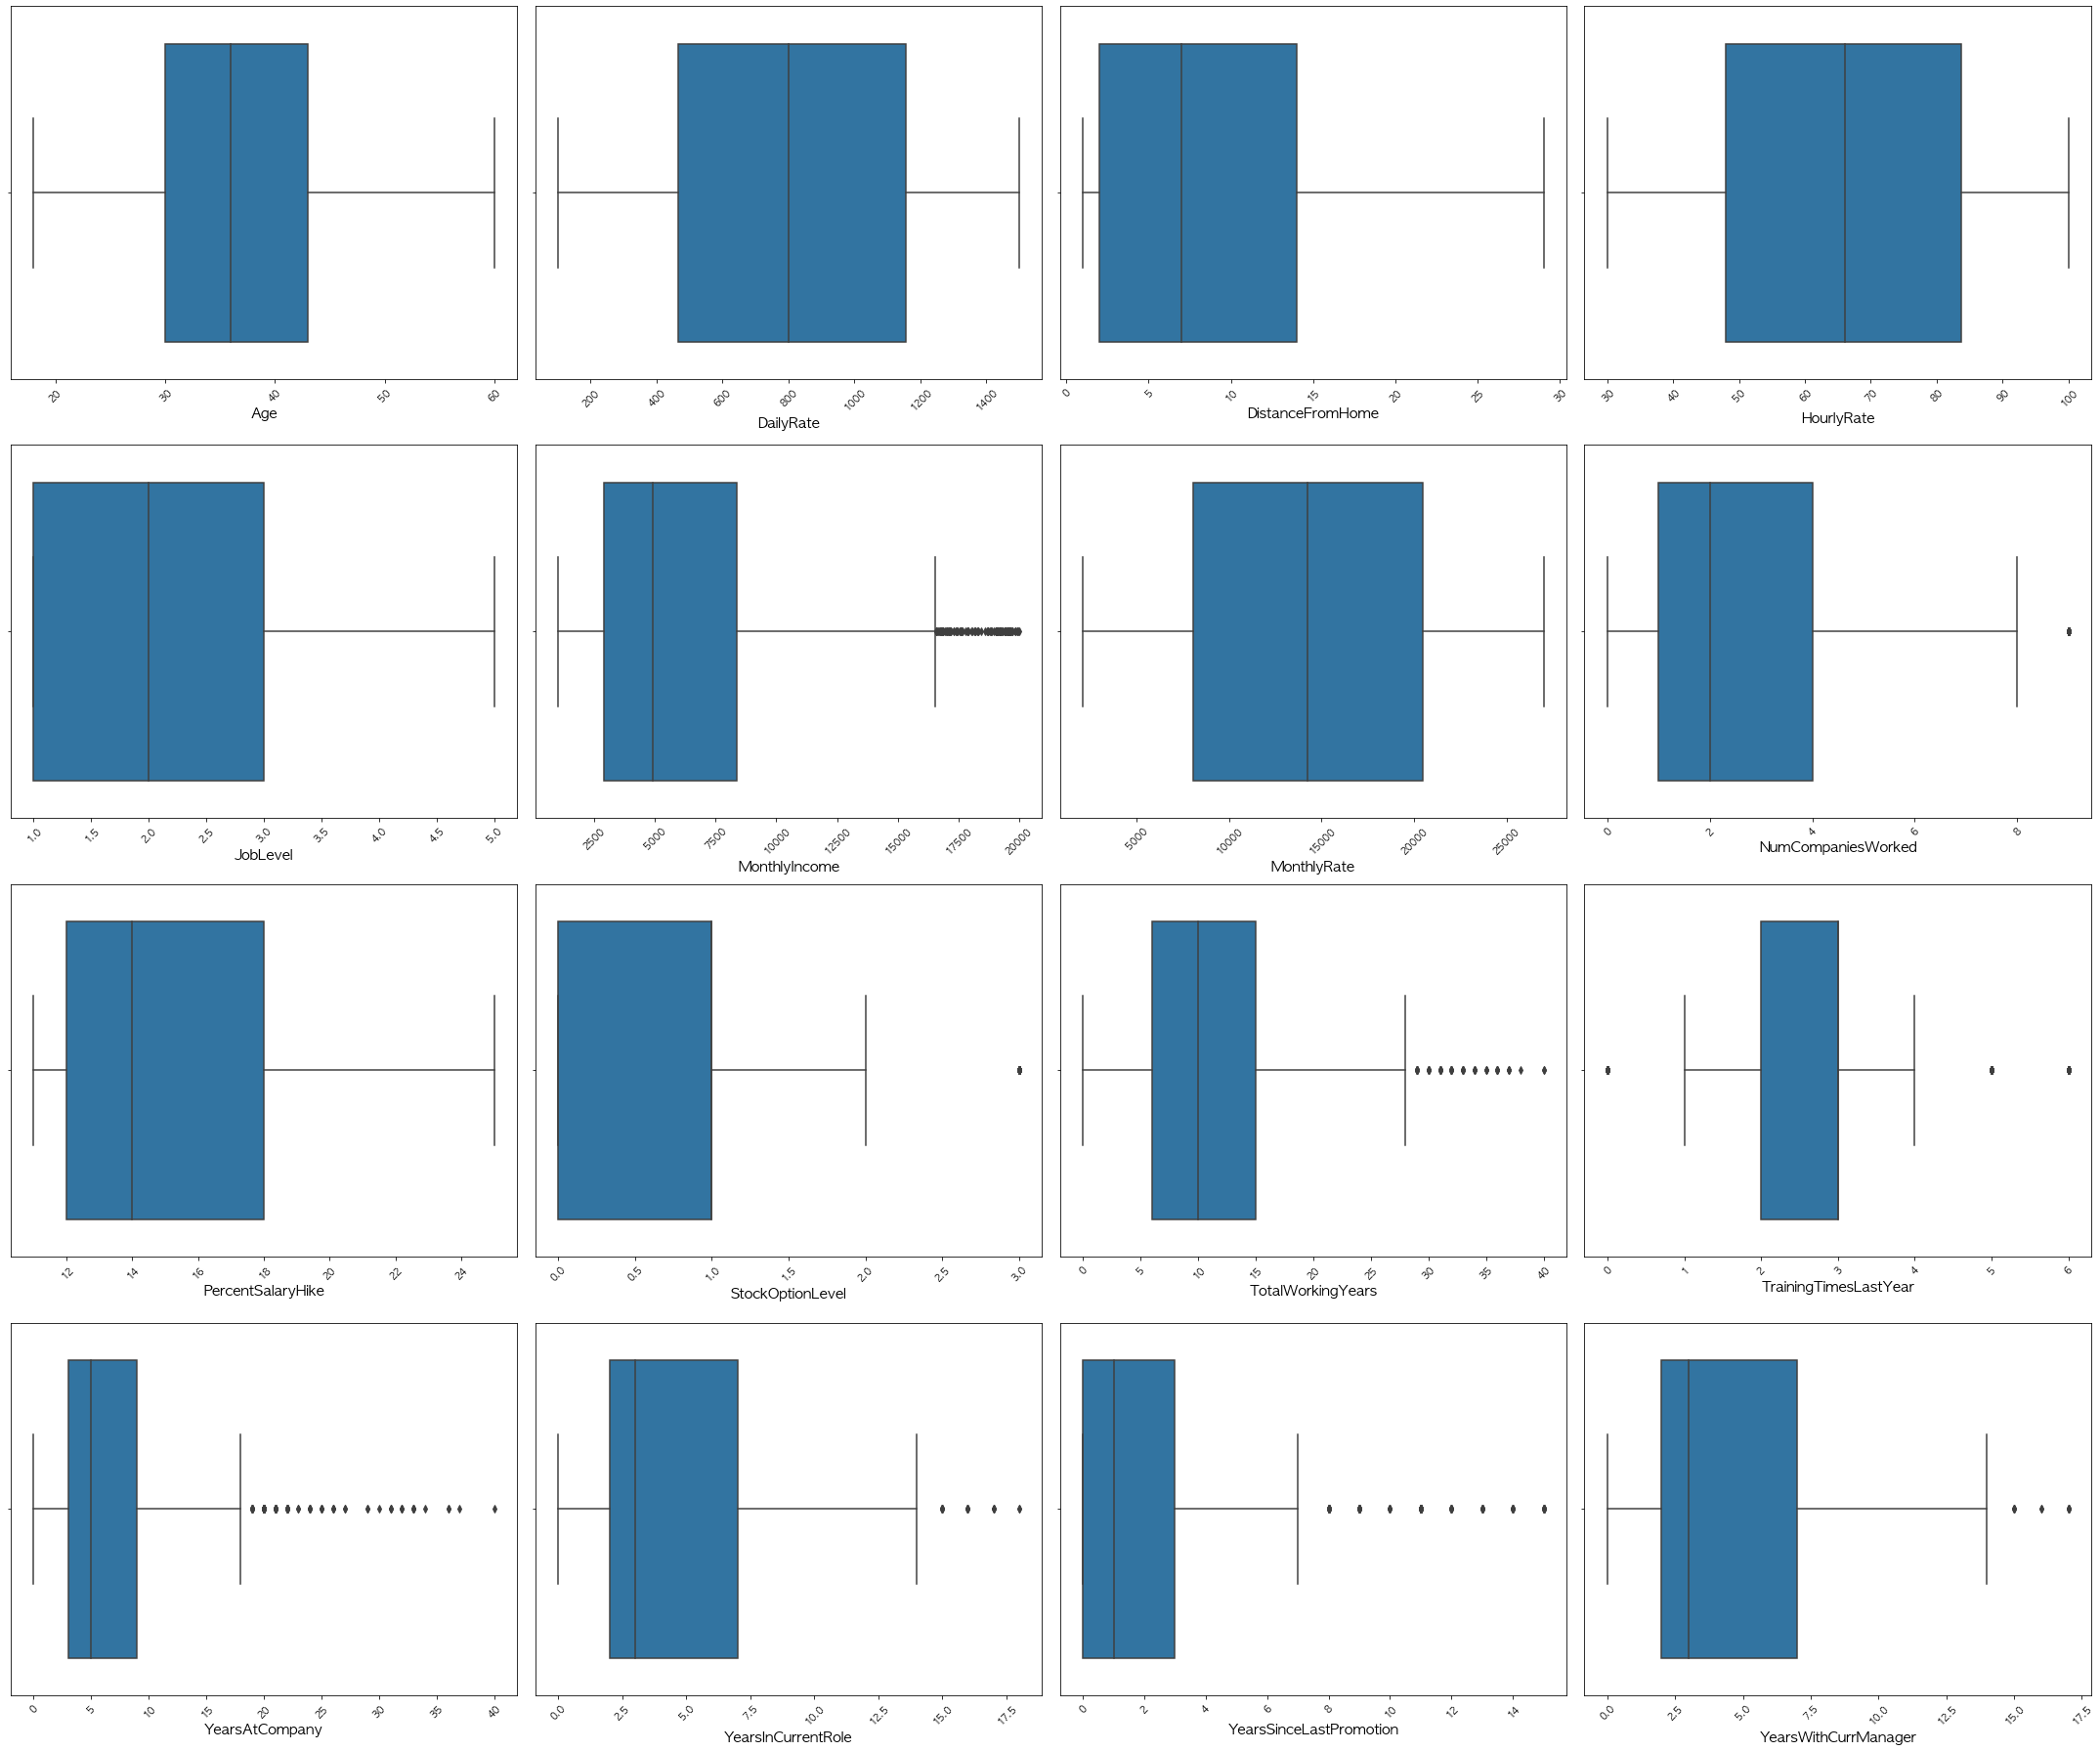

In [90]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.boxplot(df[int_col[i]])
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.show()

In [91]:
# MonthlyIncome, NumCompaniesWorked, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
# YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [92]:
# MonthlyIncome 이상치

q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

monthlyincome_outlier = df[(df['MonthlyIncome'] < lf) | (df['MonthlyIncome'] > uf)]

In [93]:
# NumCompaniesWorked 이상치

q1 = np.percentile(df['NumCompaniesWorked'],25)
q3 = np.percentile(df['NumCompaniesWorked'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

numcompaniesworked_outlier = df[(df['NumCompaniesWorked'] < lf) | (df['NumCompaniesWorked'] > uf)]

In [94]:
# StockOptionLevel 이상치

q1 = np.percentile(df['StockOptionLevel'],25)
q3 = np.percentile(df['StockOptionLevel'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

stockoptionlevel_outlier = df[(df['StockOptionLevel'] < lf) | (df['StockOptionLevel'] > uf)]

In [95]:
# TotalWorkingYears 이상치

q1 = np.percentile(df['TotalWorkingYears'],25)
q3 = np.percentile(df['TotalWorkingYears'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

totalworkingyears_outlier = df[(df['TotalWorkingYears'] < lf) | (df['TotalWorkingYears'] > uf)]

In [96]:
# TrainingTimesLastYear 이상치

q1 = np.percentile(df['TrainingTimesLastYear'],25)
q3 = np.percentile(df['TrainingTimesLastYear'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

trainingtimeslastyear_outlier = df[(df['TrainingTimesLastYear'] < lf) | (df['TrainingTimesLastYear'] > uf)]

In [97]:
# YearsAtCompany 이상치

q1 = np.percentile(df['YearsAtCompany'],25)
q3 = np.percentile(df['YearsAtCompany'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearsatcompany_outlier = df[(df['YearsAtCompany'] < lf) | (df['YearsAtCompany'] > uf)]

In [98]:
# YearsInCurrentRole 이상치

q1 = np.percentile(df['YearsInCurrentRole'],25)
q3 = np.percentile(df['YearsInCurrentRole'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearsincurrentrole_outlier = df[(df['YearsInCurrentRole'] < lf) | (df['YearsInCurrentRole'] > uf)]

In [99]:
# YearsSinceLastPromotion 이상치

q1 = np.percentile(df['YearsSinceLastPromotion'],25)
q3 = np.percentile(df['YearsSinceLastPromotion'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearssincelastpromotion_outlier = df[(df['YearsSinceLastPromotion'] < lf) | (df['YearsSinceLastPromotion'] > uf)]

In [100]:
# YearsWithCurrManager 이상치

q1 = np.percentile(df['YearsWithCurrManager'],25)
q3 = np.percentile(df['YearsWithCurrManager'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearswithcurrmanager_outlier = df[(df['YearsWithCurrManager'] < lf) | (df['YearsWithCurrManager'] > uf)]

In [101]:
outlier = pd.concat([monthlyincome_outlier,numcompaniesworked_outlier,stockoptionlevel_outlier,totalworkingyears_outlier,trainingtimeslastyear_outlier,yearsatcompany_outlier,yearsincurrentrole_outlier,yearssincelastpromotion_outlier,yearswithcurrmanager_outlier]).drop_duplicates()
df_new = df.drop(index=outlier.index)

In [102]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very High,Male,79,High,1,Laboratory Technician,Very High,Single,3068,11864,0,No,13,Excellent,High,0,8,2,Good,7,7,3,6
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,Very High,Male,67,High,1,Laboratory Technician,High,Divorced,2693,13335,1,No,22,Outstanding,Medium,1,1,2,Better,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,Bachelor,Medical,Medium,Male,74,High,2,Manufacturing Director,Low,Single,9936,3787,0,No,19,Excellent,Medium,0,10,2,Better,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,Bachelor,Other,Very High,Female,30,Medium,1,Sales Representative,High,Single,2966,21378,0,No,18,Excellent,Very High,0,5,2,Better,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8


In [103]:
df.corr(method='pearson')

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.002966,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,0.005303,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.027853,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobLevel,0.509604,0.002966,0.005303,-0.027853,1.000000,0.950300,0.039563,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,0.950300,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.039563,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.034730,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
StockOptionLevel,0.037510,0.042143,0.044872,0.050263,0.013984,0.005408,-0.034323,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698


In [406]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']].corr(method='pearson')

""


In [ ]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']].corrwith(method='pearson')

In [411]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']]

df_dum = pd.get_dummies(df[['Attrition','BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']])

In [503]:
#df_dum.drop('Attrition_No',inplace=True,axis=1)
#df_dum
df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes'])

BusinessTravel_Non-Travel           -0.074457
BusinessTravel_Travel_Frequently     0.115143
BusinessTravel_Travel_Rarely        -0.049538
Department_Human Resources           0.016832
Department_Research & Development   -0.085293
Department_Sales                     0.080855
EnvironmentSatisfaction_High        -0.044209
EnvironmentSatisfaction_Low          0.122819
EnvironmentSatisfaction_Medium      -0.015267
EnvironmentSatisfaction_Very High   -0.047909
JobSatisfaction_High                 0.007015
JobSatisfaction_Low                  0.090329
JobSatisfaction_Medium               0.004038
JobSatisfaction_Very High           -0.087830
WorkLifeBalance_Bad                  0.098689
WorkLifeBalance_Best                 0.014131
WorkLifeBalance_Better              -0.064301
WorkLifeBalance_Good                 0.011093
MaritalStatus_Divorced              -0.087716
MaritalStatus_Married               -0.090984
MaritalStatus_Single                 0.175419
dtype: float64

In [417]:
df_dum_corr = df_dum.corr(method='pearson')

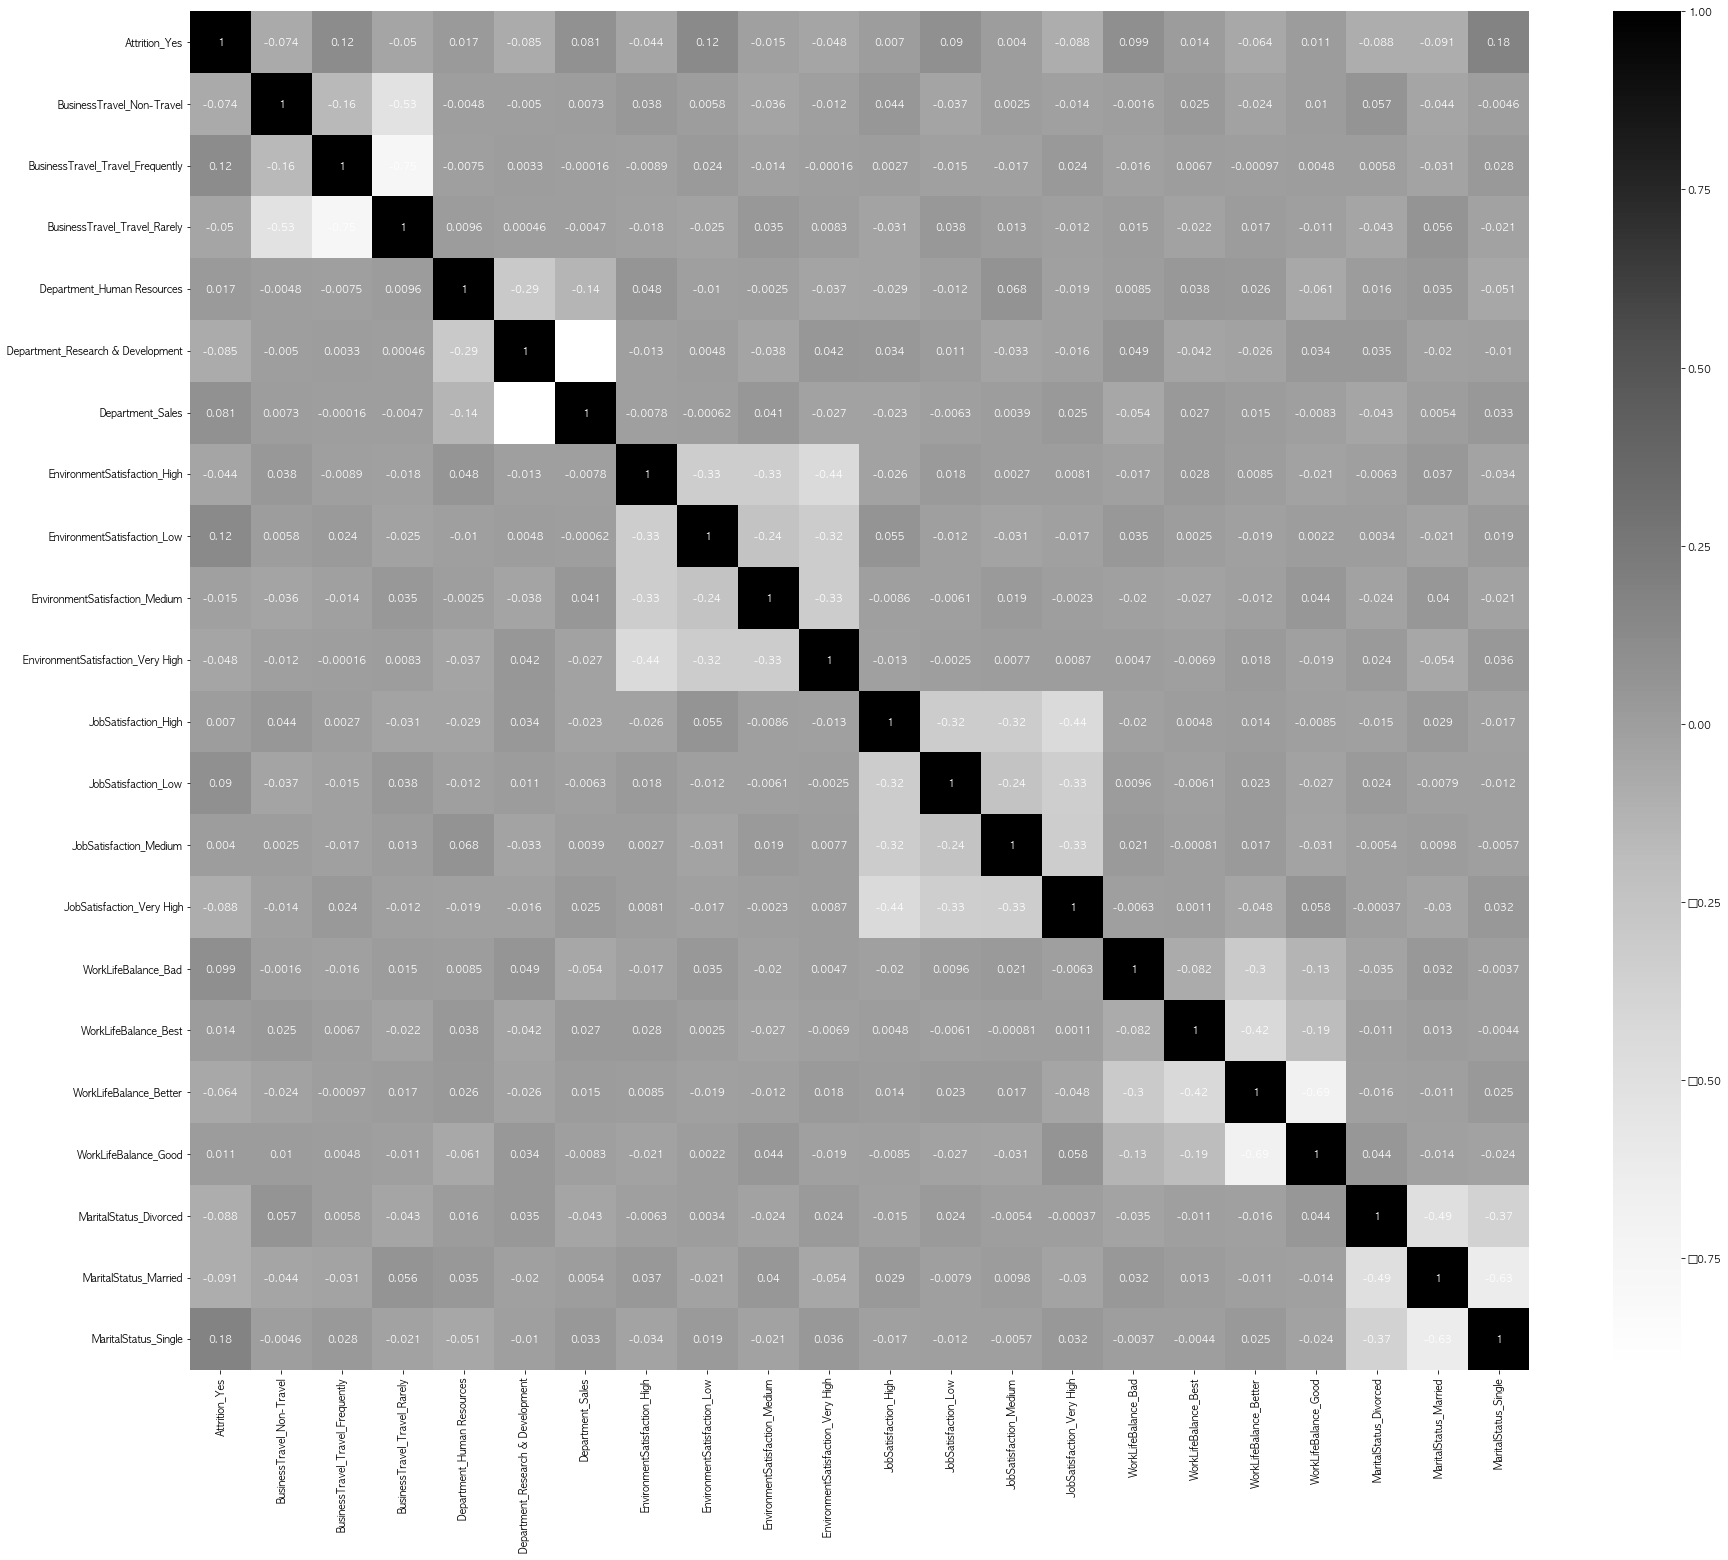

In [422]:
fig = plt.figure(figsize=(30,25))
ax = sns.heatmap(df_dum_corr, annot=True, annot_kws=dict(color='white'), cmap='Greys')
plt.show()

In [456]:
df_dum.corrwith(df_dum['Attrition_Yes'])

Attrition_Yes                        1.000000
BusinessTravel_Non-Travel           -0.074457
BusinessTravel_Travel_Frequently     0.115143
BusinessTravel_Travel_Rarely        -0.049538
Department_Human Resources           0.016832
Department_Research & Development   -0.085293
Department_Sales                     0.080855
EnvironmentSatisfaction_High        -0.044209
EnvironmentSatisfaction_Low          0.122819
EnvironmentSatisfaction_Medium      -0.015267
EnvironmentSatisfaction_Very High   -0.047909
JobSatisfaction_High                 0.007015
JobSatisfaction_Low                  0.090329
JobSatisfaction_Medium               0.004038
JobSatisfaction_Very High           -0.087830
WorkLifeBalance_Bad                  0.098689
WorkLifeBalance_Best                 0.014131
WorkLifeBalance_Better              -0.064301
WorkLifeBalance_Good                 0.011093
MaritalStatus_Divorced              -0.087716
MaritalStatus_Married               -0.090984
MaritalStatus_Single              

<BarContainer object of 21 artists>

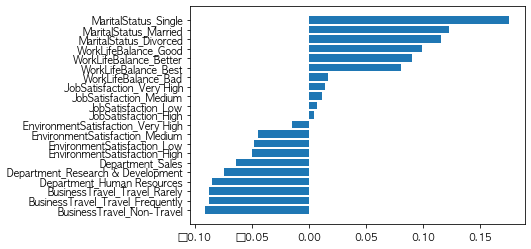

In [497]:
plt.barh(df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes']).index,sorted(df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes']).value_counts().index))

In [463]:
df_dum.corrwith(df_dum['Attrition_Yes']).value_counts().index

Float64Index([                  1.0,  -0.07445729928085217,
               -0.09098365120728241,  -0.08771634588934239,
                0.01109270611711712,  -0.06430113056040168,
               0.014131008932587365,   0.09868879430265973,
               -0.08782995674989187, 0.0040379630211742805,
                0.09032885821102225, 0.0070145117360170305,
              -0.047908719201882784, -0.015267423237125226,
                0.12281865180602311, -0.044209167369016165,
                0.08085520213605392,  -0.08529292757679661,
               0.016832009604497367, -0.049537838366947536,
                0.11514276554505076,   0.17541855360921976],
             dtype='float64')

In [474]:
dfdf = pd.get_dummies(df)
dfdf

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Female,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0
1,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
3,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0
4,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,17,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
1466,39,613,6,42,3,9991,21457,4,15,1,9,5,7,7,1,7,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1467,27,155,4,87,2,6142,5174,1,20,1,6,0,6,2,0,3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1468,49,1023,2,63,2,5390,13243,2,14,0,17,3,9,6,0,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [475]:
dfdf.drop('Attrition_No',inplace=True,axis=1)

<BarContainer object of 71 artists>

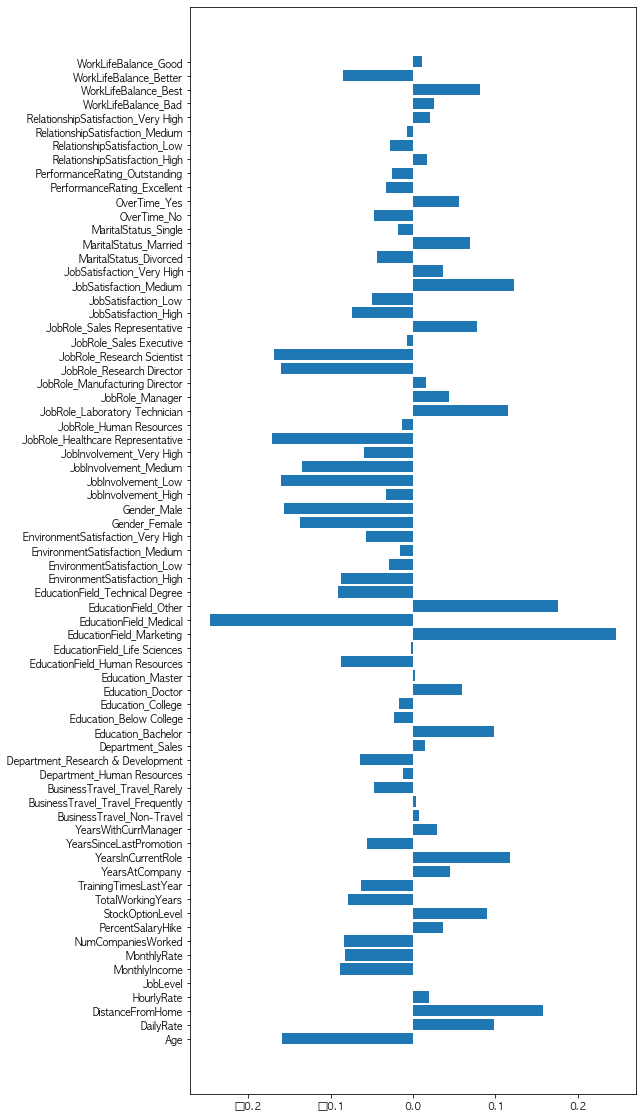

In [496]:
fig = plt.figure(figsize=(8,20))
plt.barh(dfdf.drop('Attrition_Yes',axis=1).corrwith(dfdf['Attrition_Yes']).index,dfdf.drop('Attrition_Yes',axis=1).corrwith(dfdf['Attrition_Yes']).value_counts().index)

In [509]:
dd = pd.get_dummies(df)

In [510]:
dd_new = dd.drop('Attrition_No',axis=1)

In [511]:
dd_new

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Female,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0
1,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
3,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0
4,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,17,3,5,2,0,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
1466,39,613,6,42,3,9991,21457,4,15,1,9,5,7,7,1,7,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1467,27,155,4,87,2,6142,5174,1,20,1,6,0,6,2,0,3,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1468,49,1023,2,63,2,5390,13243,2,14,0,17,3,9,6,0,8,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [512]:
object_col

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

AttributeError: 'DataFrame' object has no attribute 'cat'